Instalaciones

In [1]:
#!pip install xgboost

In [2]:
#!pip install lightgbm

In [3]:
#!conda config --add channels conda-forge
#!conda install catboost -y

In [4]:
#!pip install scikit-plot

## Clasificando voces humanas por género

descripcion

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../data/100000/cv-valid-train_Bark_Bands_spectrum_pars.csv')

In [7]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration,bb1,bb2,...,bb24,ok,pow,mfq,std,modafq,medianfq,IQR,Q1,Q3
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1.0,0.0,NaN,NaN,NaN,NaN,0.002633,0.086439,...,0.000718,1.0,1.650145e-03,1213.752897,1388.294226,192.279502,738.578060,1100.415343,443.684339,1544.099682
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1.0,0.0,NaN,NaN,NaN,NaN,0.001395,0.224020,...,0.000032,1.0,7.916365e-07,456.555733,379.835427,135.382170,437.673864,318.187839,249.966883,568.154722
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1.0,0.0,NaN,NaN,NaN,NaN,0.000594,0.301720,...,0.000052,1.0,6.124250e-04,2557.028597,2663.549506,155.946962,504.056996,4553.334653,171.185434,4724.520087
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1.0,0.0,NaN,NaN,NaN,NaN,0.000953,0.028043,...,0.000403,1.0,1.982778e-05,524.126760,819.548646,468.886545,451.559440,227.361760,253.879765,481.241525
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3.0,2.0,NaN,NaN,NaN,NaN,0.000661,0.128622,...,0.000383,1.0,4.150297e-02,652.053861,1263.434945,213.101331,224.564995,249.744115,209.416581,459.160696


In [8]:
df = df[df['ok']==1]

In [9]:
df = df[~df['gender'].isna()]

In [10]:
df = df[~(df['gender']=='other')]


In [11]:
df = df.loc[:,['gender','pow','mfq','std','modafq','medianfq','IQR','Q1','Q3']]

In [12]:
df.head(40)

,gender,pow,mfq,std,modafq,medianfq,IQR,Q1,Q3
5,female,0.000017,545.024555,993.741931,192.406803,207.180897,195.499055,194.640096,390.139151
8,male,0.000257,839.337584,732.968113,443.214910,542.224811,779.266162,433.896331,1213.162493
13,female,0.000630,1356.506599,801.070553,538.333729,1377.877997,1371.469262,553.999525,1925.468787
14,male,0.000361,438.110419,461.466344,443.802423,436.533085,224.417521,256.849953,481.267474
19,male,0.000793,519.161873,1215.492443,121.056889,238.608789,344.297654,121.056889,465.354543
20,male,0.002588,5227.865238,3320.891488,399.618916,5402.217218,5654.252555,1955.135978,7609.388533
23,male,0.002497,1118.093081,1117.676677,531.348411,572.860006,903.521328,515.888921,1419.410249
26,female,0.003784,1425.829475,2118.290812,179.482032,576.390283,1380.847219,227.263602,1608.110821
27,male,0.002088,873.806997,1052.436351,362.725451,514.171200,339.536215,391.926711,731.462926
29,male,0.001666,481.198279,442.292369,331.152588,452.568790,242.639985,304.021551,546.661536


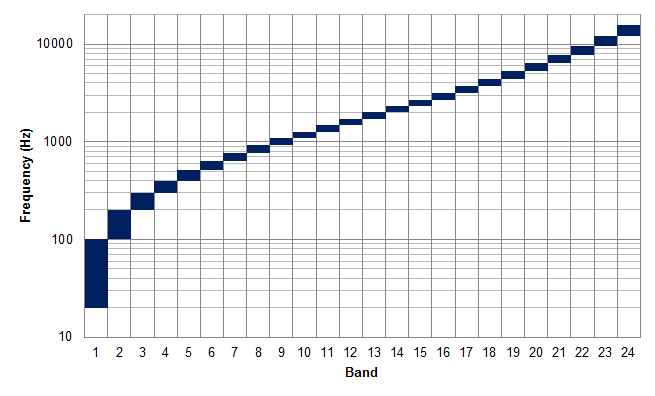

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


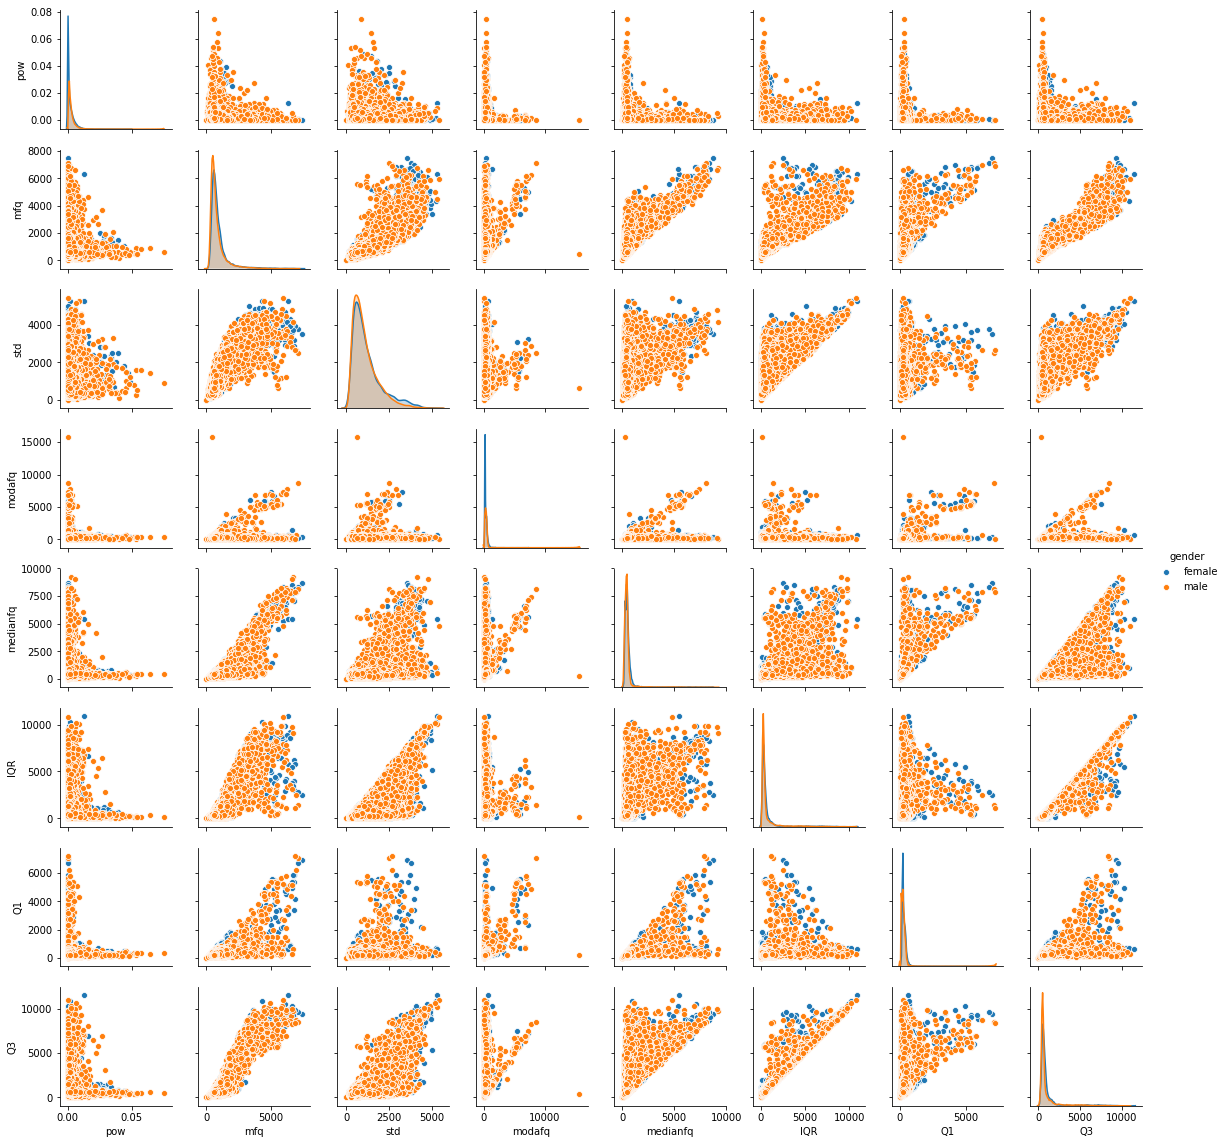

In [14]:
seaborn.pairplot(df[['gender','pow','mfq','std','modafq','medianfq','IQR','Q1','Q3']], 
                 hue='gender', size=2)

Transformamos la clase en 0 y 1 con LabelEncoder

In [15]:
y = df["gender"]
X = df.drop("gender", axis = 1)

In [16]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  38902  filas y  8  columnas


In [17]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [18]:
encoder = LabelEncoder()

In [19]:
y.head()

5     female
8       male
13    female
14      male
19      male
Name: gender, dtype: object

In [20]:
y.value_counts()

male      29188
female     9714
Name: gender, dtype: int64

In [21]:
y.unique()

array(['female', 'male'], dtype=object)

In [22]:
y = encoder.fit_transform(y)

In [23]:
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

Hagamos un split en train y test.

In [24]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [27]:
model_knn = KNeighborsClassifier()

In [28]:
params = {"n_neighbors":list(range(3,8))}

In [29]:
knn = GridSearchCV(model_knn, params, verbose= True)

Imputamos los NA con 0

In [30]:
X_train_na = X_train.fillna(0)
X_test_na = X_test.fillna(0)

In [31]:
stds = StandardScaler()

In [32]:
X_train_knn = stds.fit_transform(X_train_na)

In [33]:
X_test_knn = stds.transform(X_test_na)

In [34]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
La búsqueda con knn llevó:  14.770105600357056  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   14.6s finished


In [35]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [36]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.7784464286631101


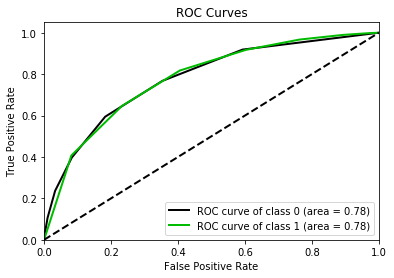

In [37]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rf = RandomForestClassifier()

In [40]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [41]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [42]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [43]:
start = time.time()
rf.fit(X_train_na,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   47.2s finished


La búsqueda con Random Forest llevó:  48.84769535064697  segundos


In [44]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_predicted_rf = rf.predict_proba(X_test_na)

In [46]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.835394633379396


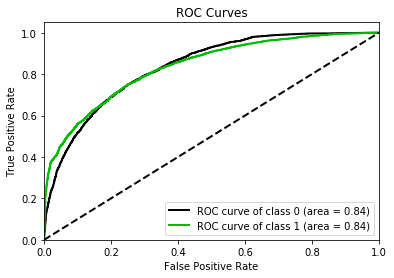

In [47]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [48]:
from xgboost.sklearn import XGBClassifier

In [49]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [50]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [51]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Se puede consultar los parámetros <a = "http://xgboost.readthedocs.io/en/latest/python/python_api.html"> aquí </a> y <a = "https://github.com/dmlc/xgboost/blob/master/doc/parameter.md"> aquí </a>

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [52]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

¿Es necesario normalizar los features antes de aplicar XGBoost?

In [53]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

La búsqueda con XGBoost llevó:  30.26746392250061  segundos


In [54]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [55]:
y_predicted_xgb[:,0].shape

(9726,)

In [56]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.8414771479314999


Graficamos la curva ROC por clase

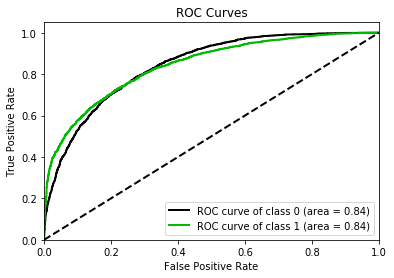

In [57]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

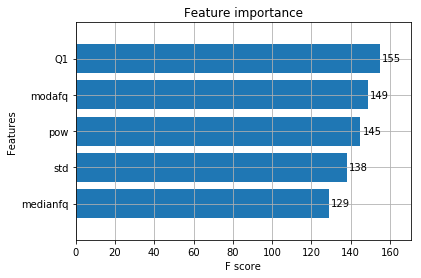

In [58]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

También se pueden acceder los valores directamente con el atributo feature_importances_

In [59]:
print(xgb.best_estimator_.feature_importances_)

[0.14485514 0.0989011  0.13786213 0.14885116 0.12887113 0.07692308
 0.15484515 0.10889111]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [60]:
import lightgbm as lgb

In [61]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [62]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [63]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

La búsqueda con LightGBM llevó:  6.889833211898804  segundos


C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    6.7s finished


In [64]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.9817694907917315, 'gamma': 7.9495416194850925, 'learning_rate': 0.3851036222113484, 'max_depth': 11, 'min_child_weight': 10.592044441161061, 'n_estimators': 37, 'reg_alpha': 1.2759322118366256, 'subsample': 0.9294635097337632}


In [65]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [66]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.8414111654924764


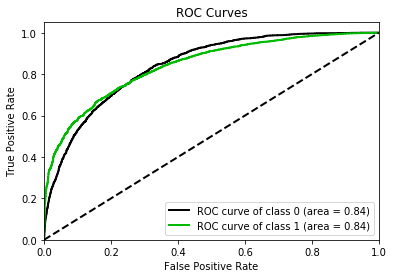

In [67]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

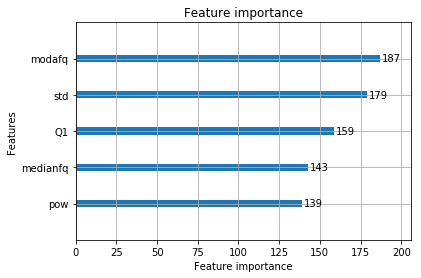

In [68]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [69]:
lgbm.best_estimator_.feature_importances_

array([139, 108, 179, 187, 143,  95, 159, 100])

## CatBoost

In [70]:
from catboost import CatBoostClassifier

In [71]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [72]:
model_cat.fit(X_train, y_train)

0:	learn: 0.6703759	total: 202ms	remaining: 3m 21s
1:	learn: 0.6499933	total: 233ms	remaining: 1m 56s
2:	learn: 0.6319584	total: 268ms	remaining: 1m 29s
3:	learn: 0.6155623	total: 297ms	remaining: 1m 13s
4:	learn: 0.6015081	total: 322ms	remaining: 1m 4s
5:	learn: 0.5895020	total: 350ms	remaining: 57.9s
6:	learn: 0.5783553	total: 376ms	remaining: 53.4s
7:	learn: 0.5691070	total: 406ms	remaining: 50.3s
8:	learn: 0.5595366	total: 434ms	remaining: 47.8s
9:	learn: 0.5512178	total: 471ms	remaining: 46.6s
10:	learn: 0.5453078	total: 500ms	remaining: 44.9s
11:	learn: 0.5407706	total: 530ms	remaining: 43.6s
12:	learn: 0.5348127	total: 556ms	remaining: 42.2s
13:	learn: 0.5290823	total: 584ms	remaining: 41.2s
14:	learn: 0.5238695	total: 620ms	remaining: 40.7s
15:	learn: 0.5198358	total: 652ms	remaining: 40.1s
16:	learn: 0.5150837	total: 681ms	remaining: 39.4s
17:	learn: 0.5112453	total: 710ms	remaining: 38.7s
18:	learn: 0.5075730	total: 742ms	remaining: 38.3s
19:	learn: 0.5045093	total: 774ms	rem

165:	learn: 0.4310299	total: 5.08s	remaining: 25.5s
166:	learn: 0.4309476	total: 5.11s	remaining: 25.5s
167:	learn: 0.4307630	total: 5.14s	remaining: 25.5s
168:	learn: 0.4306194	total: 5.17s	remaining: 25.4s
169:	learn: 0.4304639	total: 5.2s	remaining: 25.4s
170:	learn: 0.4303019	total: 5.23s	remaining: 25.4s
171:	learn: 0.4301687	total: 5.26s	remaining: 25.3s
172:	learn: 0.4299176	total: 5.29s	remaining: 25.3s
173:	learn: 0.4298187	total: 5.32s	remaining: 25.3s
174:	learn: 0.4295613	total: 5.36s	remaining: 25.2s
175:	learn: 0.4294047	total: 5.38s	remaining: 25.2s
176:	learn: 0.4292355	total: 5.41s	remaining: 25.2s
177:	learn: 0.4291127	total: 5.45s	remaining: 25.1s
178:	learn: 0.4289302	total: 5.47s	remaining: 25.1s
179:	learn: 0.4288043	total: 5.51s	remaining: 25.1s
180:	learn: 0.4286651	total: 5.55s	remaining: 25.1s
181:	learn: 0.4285358	total: 5.58s	remaining: 25.1s
182:	learn: 0.4283937	total: 5.62s	remaining: 25.1s
183:	learn: 0.4283148	total: 5.66s	remaining: 25.1s
184:	learn: 0

328:	learn: 0.4122775	total: 10.2s	remaining: 20.7s
329:	learn: 0.4120921	total: 10.2s	remaining: 20.7s
330:	learn: 0.4120267	total: 10.2s	remaining: 20.6s
331:	learn: 0.4118094	total: 10.2s	remaining: 20.6s
332:	learn: 0.4117605	total: 10.3s	remaining: 20.6s
333:	learn: 0.4116466	total: 10.3s	remaining: 20.5s
334:	learn: 0.4116453	total: 10.3s	remaining: 20.5s
335:	learn: 0.4115641	total: 10.4s	remaining: 20.5s
336:	learn: 0.4114747	total: 10.4s	remaining: 20.4s
337:	learn: 0.4114146	total: 10.4s	remaining: 20.4s
338:	learn: 0.4113253	total: 10.4s	remaining: 20.4s
339:	learn: 0.4112316	total: 10.5s	remaining: 20.3s
340:	learn: 0.4111462	total: 10.5s	remaining: 20.3s
341:	learn: 0.4110659	total: 10.5s	remaining: 20.3s
342:	learn: 0.4109761	total: 10.6s	remaining: 20.2s
343:	learn: 0.4107952	total: 10.6s	remaining: 20.2s
344:	learn: 0.4106921	total: 10.6s	remaining: 20.2s
345:	learn: 0.4105584	total: 10.7s	remaining: 20.1s
346:	learn: 0.4104064	total: 10.7s	remaining: 20.1s
347:	learn: 

491:	learn: 0.3990111	total: 15.4s	remaining: 15.9s
492:	learn: 0.3989955	total: 15.4s	remaining: 15.9s
493:	learn: 0.3989370	total: 15.5s	remaining: 15.9s
494:	learn: 0.3989354	total: 15.5s	remaining: 15.8s
495:	learn: 0.3988805	total: 15.5s	remaining: 15.8s
496:	learn: 0.3988351	total: 15.6s	remaining: 15.8s
497:	learn: 0.3987816	total: 15.6s	remaining: 15.7s
498:	learn: 0.3987049	total: 15.6s	remaining: 15.7s
499:	learn: 0.3986392	total: 15.7s	remaining: 15.7s
500:	learn: 0.3985694	total: 15.7s	remaining: 15.6s
501:	learn: 0.3985171	total: 15.7s	remaining: 15.6s
502:	learn: 0.3984220	total: 15.8s	remaining: 15.6s
503:	learn: 0.3983632	total: 15.8s	remaining: 15.5s
504:	learn: 0.3983347	total: 15.8s	remaining: 15.5s
505:	learn: 0.3983341	total: 15.8s	remaining: 15.4s
506:	learn: 0.3981988	total: 15.9s	remaining: 15.4s
507:	learn: 0.3981728	total: 15.9s	remaining: 15.4s
508:	learn: 0.3981215	total: 15.9s	remaining: 15.4s
509:	learn: 0.3980484	total: 16s	remaining: 15.3s
510:	learn: 0.

657:	learn: 0.3904716	total: 20.4s	remaining: 10.6s
658:	learn: 0.3904526	total: 20.4s	remaining: 10.6s
659:	learn: 0.3904084	total: 20.5s	remaining: 10.5s
660:	learn: 0.3903614	total: 20.5s	remaining: 10.5s
661:	learn: 0.3902653	total: 20.5s	remaining: 10.5s
662:	learn: 0.3902291	total: 20.6s	remaining: 10.5s
663:	learn: 0.3901855	total: 20.6s	remaining: 10.4s
664:	learn: 0.3901696	total: 20.6s	remaining: 10.4s
665:	learn: 0.3901307	total: 20.7s	remaining: 10.4s
666:	learn: 0.3900331	total: 20.7s	remaining: 10.3s
667:	learn: 0.3898934	total: 20.7s	remaining: 10.3s
668:	learn: 0.3898699	total: 20.8s	remaining: 10.3s
669:	learn: 0.3898170	total: 20.8s	remaining: 10.2s
670:	learn: 0.3897393	total: 20.8s	remaining: 10.2s
671:	learn: 0.3897171	total: 20.9s	remaining: 10.2s
672:	learn: 0.3896363	total: 20.9s	remaining: 10.1s
673:	learn: 0.3895817	total: 20.9s	remaining: 10.1s
674:	learn: 0.3895557	total: 20.9s	remaining: 10.1s
675:	learn: 0.3895555	total: 21s	remaining: 10.1s
676:	learn: 0.

822:	learn: 0.3837199	total: 25.4s	remaining: 5.46s
823:	learn: 0.3837036	total: 25.4s	remaining: 5.43s
824:	learn: 0.3836708	total: 25.4s	remaining: 5.4s
825:	learn: 0.3836434	total: 25.5s	remaining: 5.37s
826:	learn: 0.3835526	total: 25.5s	remaining: 5.34s
827:	learn: 0.3835167	total: 25.6s	remaining: 5.31s
828:	learn: 0.3834977	total: 25.6s	remaining: 5.28s
829:	learn: 0.3834387	total: 25.6s	remaining: 5.25s
830:	learn: 0.3834375	total: 25.6s	remaining: 5.21s
831:	learn: 0.3834333	total: 25.7s	remaining: 5.18s
832:	learn: 0.3833663	total: 25.7s	remaining: 5.15s
833:	learn: 0.3833316	total: 25.7s	remaining: 5.12s
834:	learn: 0.3832855	total: 25.8s	remaining: 5.09s
835:	learn: 0.3832219	total: 25.8s	remaining: 5.06s
836:	learn: 0.3832087	total: 25.8s	remaining: 5.03s
837:	learn: 0.3831748	total: 25.8s	remaining: 5s
838:	learn: 0.3831694	total: 25.9s	remaining: 4.96s
839:	learn: 0.3831461	total: 25.9s	remaining: 4.93s
840:	learn: 0.3831237	total: 25.9s	remaining: 4.9s
841:	learn: 0.383

985:	learn: 0.3784579	total: 30.2s	remaining: 429ms
986:	learn: 0.3784433	total: 30.3s	remaining: 399ms
987:	learn: 0.3783837	total: 30.3s	remaining: 368ms
988:	learn: 0.3782042	total: 30.3s	remaining: 337ms
989:	learn: 0.3781936	total: 30.4s	remaining: 307ms
990:	learn: 0.3781459	total: 30.4s	remaining: 276ms
991:	learn: 0.3781271	total: 30.4s	remaining: 246ms
992:	learn: 0.3781176	total: 30.5s	remaining: 215ms
993:	learn: 0.3781045	total: 30.5s	remaining: 184ms
994:	learn: 0.3780555	total: 30.6s	remaining: 154ms
995:	learn: 0.3780551	total: 30.6s	remaining: 123ms
996:	learn: 0.3780329	total: 30.6s	remaining: 92.2ms
997:	learn: 0.3780161	total: 30.7s	remaining: 61.4ms
998:	learn: 0.3780156	total: 30.7s	remaining: 30.7ms
999:	learn: 0.3780026	total: 30.7s	remaining: 0us


In [73]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [74]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.8477389914125788


La lista de hiperparámetros se puede consultar <a = "https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

## Conclusiones

In [75]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.7784464286631101  
 - AUC de RF: 0.835394633379396  
 - AUC de XGBoost: 0.8414771479314999 
 - AUC de LightGBM: 0.8414111654924764 
 - AUC de CatBoost: 0.8477389914125788


# Matriz de confusión

In [76]:
y_predicted_cat_np = model_cat.predict(X_test)

In [77]:
y_predicted_cat_np

array([1., 1., 0., ..., 1., 1., 1.])

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted_cat_np, labels=None, sample_weight=None)

In [80]:
def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[1012 1417]
 [ 425 6872]]
Normalized confusion matrix
[[0.41663236 0.58336764]
 [0.05824311 0.94175689]]


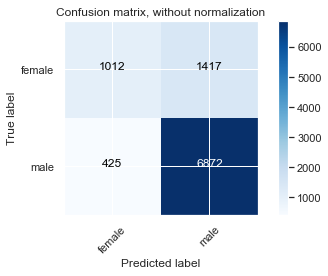

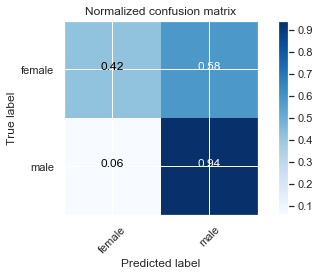

In [81]:
# Plot non-normalized confusion matrix
plt.figure()
class_names = ['female','male']
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


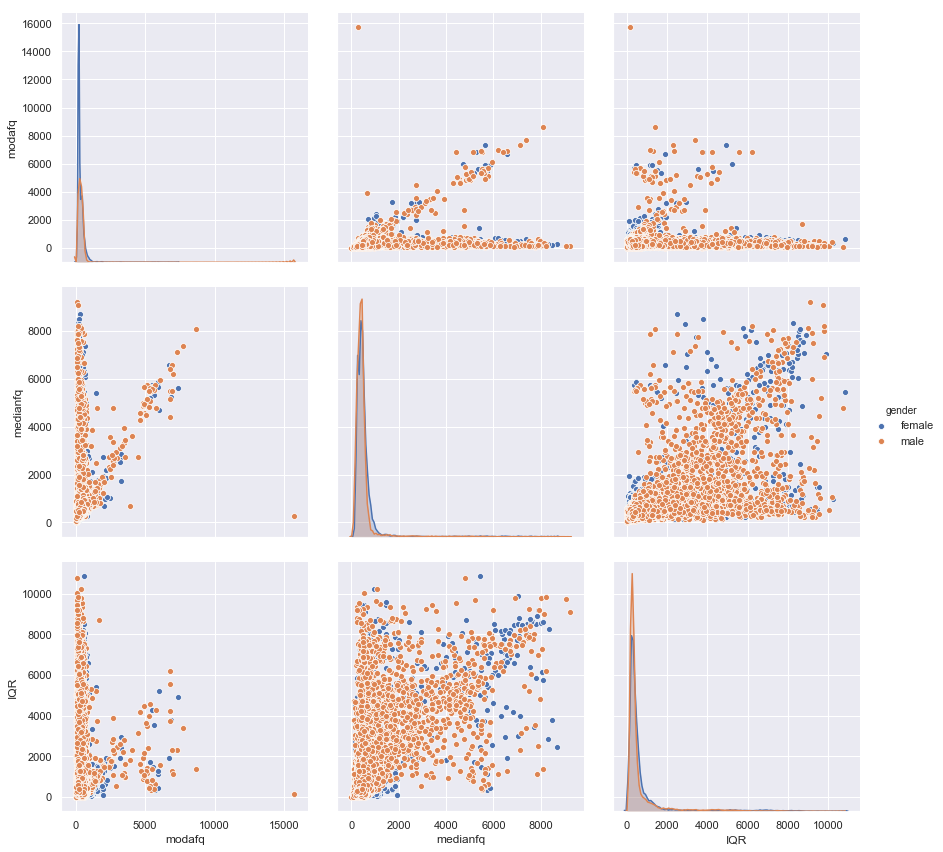

In [82]:
seaborn.pairplot(df[['gender','modafq','medianfq','IQR']], 
                 hue='gender', size=4)

C:\Users\Fran\AppData\Roaming\Python\Python36\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


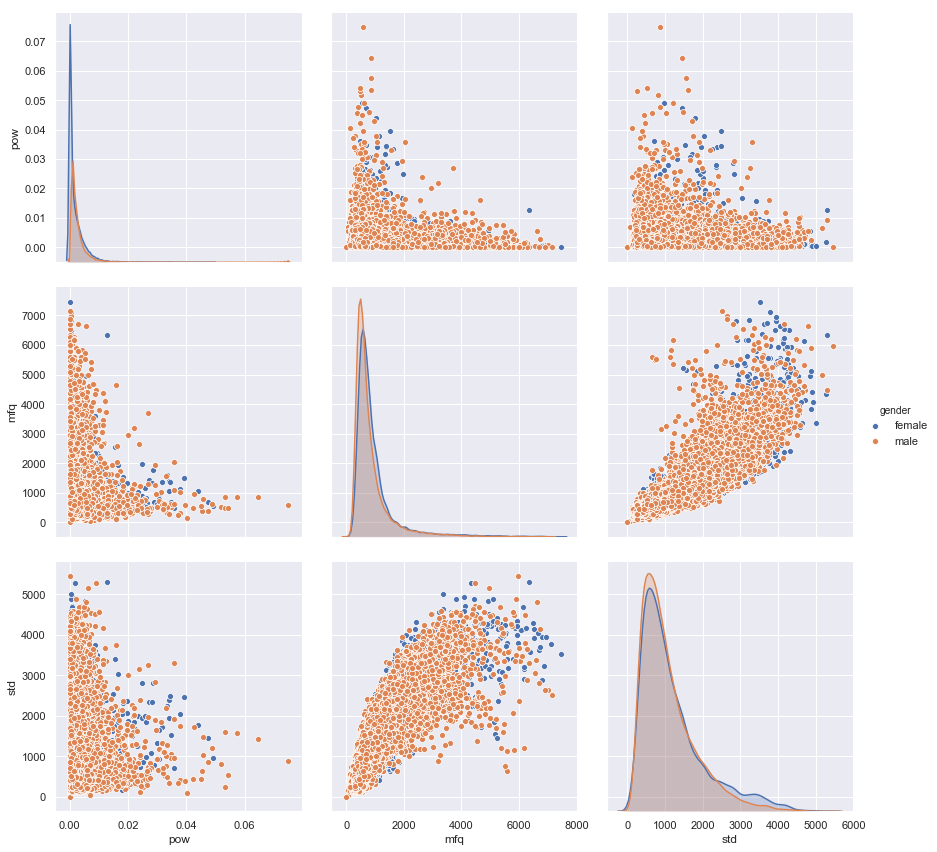

In [83]:
seaborn.pairplot(df[['gender','pow','mfq','std']], 
                 hue='gender', size=4)